In [6]:
import sys 
sys.path.append('..')

from targets import Target
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from models import SoftmaxWeight, LocationScaleFlow
from models import DIFDensityEstimator
from models import MixedModelDensityEstimator, DIFDensityEstimatorLayer, RealNVPDensityEstimatorLayer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


number of samples = 60000


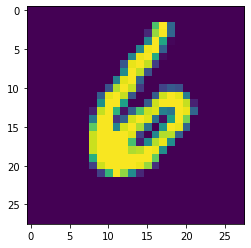

In [10]:
###MNIST###

import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 2
digit = 'all'
if digit != 'all':
    extracted = images[targets == digit].float()
else: 
    extracted = images.float()
target_samples = extracted

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[torch.randint(low = 0, high = num_samples, size = [1])].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]

In [12]:
K = 20
dif = DIFDensityEstimator(target_samples, K)
dif.train(200,3000)
dif.model_visual()

KeyboardInterrupt: 

In [ ]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/50)
initial_w = SoftmaxWeight(200, p,[5,5,5], 'Constant')
DIF = DIFDensityEstimator(target_samples, 200, initial_w = initial_w)
DIF.train(epochs, batch_size, visual = True)
DIF.model_visual(num_samples=int(num_samples/5))

In [ ]:
for _ in range(5):
    plt.figure()
    plt.imshow(DIF.sample_model(1).cpu().detach().reshape(28,28))